In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv" #Desktop/DataViz/homework/matplotlib-challenge/data/Mouse_metadata.csv
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

mouse_metadata

In [5]:

cd ..

C:\Users\lizba\Desktop\DataViz\homework\matplotlib-challenge


## summary combined table

In [10]:
# combine datasets
combo = pd.merge(mouse_metadata, study_results, how="left", on = "Mouse ID")
combo.tail(1)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1892,z969,Naftisol,Male,9,30,45,73.867845,4


In [11]:
combo.columns = ['Mouse ID','Drug Regimen','Sex','Age_months','Weight','Timepoint','Tumor_Volume','Metastatic Sites']
combo.head(3)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight,Timepoint,Tumor_Volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen

#calculating mean value for tumor size

tumor_mean = combo.groupby('Drug Regimen').Tumor_Volume.mean()
tumor_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor_Volume, dtype: float64

In [13]:
# calculating median value for tumor size
tumor_median = combo.groupby('Drug Regimen').Tumor_Volume.median()
tumor_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor_Volume, dtype: float64

In [14]:
#calculating variance for tumor size
tumor_var = combo.groupby('Drug Regimen').Tumor_Volume.var()
tumor_var

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.351070
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor_Volume, dtype: float64

In [15]:
#calculating sd for tumor size
tumor_sd = combo.groupby('Drug Regimen').Tumor_Volume.std()
tumor_sd

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.507770
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor_Volume, dtype: float64

In [16]:
#calculating SEM for tumor size
tumor_sem = combo.groupby('Drug Regimen').Tumor_Volume.sem()
tumor_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.512884
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor_Volume, dtype: float64

#  summary statistics table for tumor volume



In [17]:
####### ADD SEM column
# turn groupby object into df

sum_stats = pd.DataFrame({"Mean of Tumor Size":tumor_mean, "Median of Tumor Size":tumor_median,
                          "Variance of Tumor Size": tumor_var, "SD": tumor_sd, "SEM": tumor_sem})
sum_stats

,Mean of Tumor Size,Median of Tumor Size,Variance of Tumor Size,SD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [18]:
# figure out what plotting question wants
df = combo.groupby("Drug Regimen").count()
df

,Mouse ID,Sex,Age_months,Weight,Timepoint,Tumor_Volume,Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,161,161,161,161,161,161,161
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


# Bar Plot showing number of Data Points for each treatment regimen using Pandas PyPlot

Text(0.5, 1.0, 'Number of Treatments Per Drug')

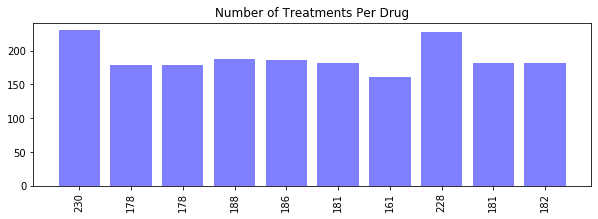

In [19]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
#pyplot
x_axis = np.arange(len(df))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(10, 3))
plt.bar(x_axis, df["Mouse ID"], color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, df["Mouse ID"], rotation="vertical")
plt.title("Number of Treatments Per Drug")

In [20]:
# USING PANDAS method to plot, not pyplot
# plot Pandas
# reduce df to just columns to be plotted

df_plot = combo[["Drug Regimen","Mouse ID"]]

# Set the index to be "State" so they will be used as labels
df_plot = df_plot.set_index("Drug Regimen")

# create groupby object to find number of data points for each treatment

df_plot = df_plot.groupby("Drug Regimen")["Mouse ID"].count()
df_plot



Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [21]:
# turn that groupby series into a dataframe to plot
df_plot = pd.DataFrame({"Drug Treatments":df_plot})
df_plot

,Drug Treatments
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,161
Ramicane,228
Stelasyn,181


# Pandas Dataframe.plot () method for bar chart

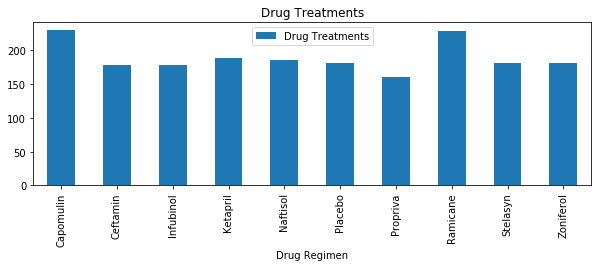

<Figure size 432x288 with 0 Axes>

In [22]:
# Use DataFrame.plot() in order to create a bar chart of the data
df_plot.plot(kind="bar", figsize=(10,3))

# Set a title for the chart
plt.title("Drug Treatments")

plt.show()
plt.tight_layout()

# Two Pie Charts of distribution of mouse gender in study

In [23]:
#Generate a # pie plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` 
#that shows the distribution of female or male mice in the study.
pie = combo[["Mouse ID","Sex"]]
pie

# set index to sex so that M/F will show as labels
pie = pie.set_index("Sex")
pie

#creat groupby object to find distribution of male and female
pie = pie.groupby("Sex")["Mouse ID"].count()
pie

# turn series created by above group by back to a datafram ready to plot
pie = pd.DataFrame({"Mouse Gender":pie})
pie

,Mouse Gender
Sex,
Female,935
Male,958


## Panda DataFrame Plot Method

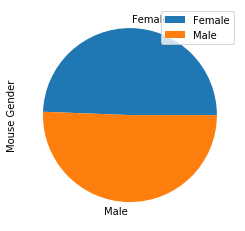

In [24]:
# show Panda DataFrame Plot ###FIX LABELS###
plot = pie.plot.pie(y="Mouse Gender")
plot



# pyplot method

C:\Users\lizba\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


Text(0.5, 1.0, 'Mouse Gender in Study')

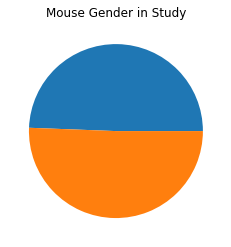

In [25]:
# now make same chart using pyplot ###SAME FIXES HERE, A START
plt.pie(pie)

plt.title("Mouse Gender in Study")


## building dataframe for next question

In [73]:
#Create a df with just the four promising drugs in it

#Create a groupby object on that df for the max timepoint for each drug/mouse, and made that into a new df 
#(groupby_df)

#Then I did an inner merge that brings together the df with the groupby_df, using the drug regimen, 
#mouse id, and timepoint as the columns to match. 

#That ended up creating a new dataframe that just had the rows from the max timepoints in it.

#final_four = combo.loc[(combo['Drug Regimen'] == "Capomulin")]
#final_four

#Create a df with just the four promising drugs in it
final_four = combo[(combo['Drug Regimen'] == 'Capomulin') | (combo['Drug Regimen'] == 'Ramicane') | \
                 (combo['Drug Regimen'] == 'Infubinol') | (combo['Drug Regimen'] == 'Ceftamin')]

final_four

,Mouse ID,Drug Regimen,Sex,Age_months,Weight,Timepoint,Tumor_Volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [74]:
#Create a groupby object on that df for the max timepoint for each drug/mouse, and made that into a new df 
#(groupby_df)
groupby_df = final_four.groupby(["Drug Regimen","Mouse ID"])["Timepoint"].max()
groupby_df.head()
#convert from groupby object to df

df1 = final_four.groupby(["Drug Regimen","Mouse ID"])["Timepoint"].max().to_frame().reset_index()

df1

# turn that groupby series into a dataframe to plot
#plot = pd.DataFrame({"Drug Treatments":plot,"Mouse ID":plot,"Timepoint":plot})
#plot

# turn that groupby series into a dataframe to plot
#df_plot = pd.DataFrame({"Drug Treatments":df_plot})
#df_plot

#groupby_df = pd.DataFrame
#groupby_df.head




,Drug Regimen,Mouse ID,Timepoint
0,Capomulin,b128,45
1,Capomulin,b742,45
2,Capomulin,f966,20
3,Capomulin,g288,45
4,Capomulin,g316,45
...,...,...,...
95,Ramicane,s508,45
96,Ramicane,u196,45
97,Ramicane,w678,5
98,Ramicane,y449,15


In [75]:
#Then I did an inner merge that brings together the df with the groupby_df, using the drug regimen, 
#mouse id, and timepoint as the columns to match. 

plot = pd.merge(df1, final_four, how="inner", on = ["Drug Regimen","Timepoint","Mouse ID"])
plot

,Drug Regimen,Mouse ID,Timepoint,Sex,Age_months,Weight,Tumor_Volume,Metastatic Sites
0,Capomulin,b128,45,Female,9,22,38.982878,2
1,Capomulin,b742,45,Male,7,21,38.939633,0
2,Capomulin,f966,20,Male,16,17,30.485985,0
3,Capomulin,g288,45,Male,3,19,37.074024,1
4,Capomulin,g316,45,Female,22,22,40.159220,2
...,...,...,...,...,...,...,...,...
95,Ramicane,s508,45,Male,1,17,30.276232,0
96,Ramicane,u196,45,Male,18,25,40.667713,3
97,Ramicane,w678,5,Female,5,24,43.166373,0
98,Ramicane,y449,15,Male,19,24,44.183451,0


# Calculate the final tumor volume for each mouse in most promising treatments
## Capomulin, Ramicane, Infubinol, Ceftamin
## Calculate the IQR and quantitatively determine 
## if there are any potential outliers.

In [60]:
# find unqiue mice
mice = combo.groupby("Drug Regimen")["Mouse ID"].count()
mice

times = combo.groupby(["Drug Regimen","Mouse ID"])["Timepoint","Tumor_Volume"].max()
times.head(2)



Timepoint  Tumor_Volume
Drug Regimen Mouse ID                         
Capomulin    b128             45     45.651331
             b742             45     45.000000

In [ ]:
#times.reset_index(level=['Drug Regimen'])


#times = pd.DataFrame(times)
#times

In [ ]:
# reduce df to only show threatments that occurerd at the final time point of 45

#final = combo.loc[(combo['Timepoint'] == 45)]
#final

## Ramicane results, sum stats and box plot.

In [ ]:
#Ramicane = final.loc[(final["Drug Regimen"] == "Ramicane")]
                  
#Ramicane.head()


In [ ]:
#find quartlies of final tumor volume in Ramican treatment

quartiles = Ramicane['Tumor_Volume'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Final Tumor Volume in Ramicane treatment is: {lowerq}")
print(f"The upper quartile of FTV is: {upperq}")
print(f"The interquartile range of FTV is: {iqr}")
print(f"The the median of FTV is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

## boxplot for Ramicine

In [ ]:
boxplot = Ramicane.boxplot(column=['Tumor_Volume'])


# DatFrame for just Capomulin resulst for last tumor volume, sum stats, and box plot.

In [ ]:
# find results for just Capomulin
Capomulin = final.loc[(final['Drug Regimen'] == "Capomulin")]
Capomulin.head(1)


In [ ]:
#find quartlies of final tumor volume in Capomulin treatment

quartiles = Capomulin['Tumor_Volume'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Final Tumor Volume in Capomulin treatment is: {lowerq}")
print(f"The upper quartile of FTV is: {upperq}")
print(f"The interquartile range of FTV is: {iqr}")
print(f"The the median of FTV is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

In [ ]:
boxplot = Capomulin.boxplot(column=['Tumor_Volume'])

# DataFrame for just Infubinol results for last tumor volume, sum stats, and box plot.

In [ ]:
Infubinol = final.loc[(final['Drug Regimen'] == "Infubinol")]
Infubinol.head()

In [ ]:
quartiles = Infubinol['Tumor_Volume'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Final Tumor Volume in Infubinol treatment is: {lowerq}")
print(f"The upper quartile of FTV is: {upperq}")
print(f"The interquartile range of FTV is: {iqr}")
print(f"The the median of FTV is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

In [ ]:
boxplot = Infubinol.boxplot(column=['Tumor_Volume'])

# Just Ceftamin

In [ ]:
Ceftamin = final.loc[(final['Drug Regimen'] == "Ceftamin")]
Ceftamin.head()


In [ ]:
quartiles = Ceftamin['Tumor_Volume'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Final Tumor Volume in Ceftamin treatment is: {lowerq}")
print(f"The upper quartile of FTV is: {upperq}")
print(f"The interquartile range of FTV is: {iqr}")
print(f"The the median of FTV is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

In [ ]:
boxplot = Ceftamin.boxplot(column=['Tumor_Volume'])

## Summary BOX PLOTS on four nest treatments

In [ ]:
fig, ax = plt.subplots(1, 4)

fig.suptitle("treatment results")
ax[0].boxplot(Ramicane["Tumor_Volume"])
ax[0].set_title("Ramicane")
ax[1].boxplot(Capomulin["Tumor_Volume"])
ax[1].set_title("Capomulin")
ax[2].boxplot(Infubinol["Tumor_Volume"])
ax[2].set_title("Infubinol")
ax[3].boxplot(Ceftamin["Tumor_Volume"])
ax[3].set_title("Ceftamin")


# Capomulin Treatments

In [ ]:
 #Generate a line plot of time point versus tumor volume for a single mouse treated with Capomulin.

 #Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.

 #Calculate the correlation coefficient and linear regression model between mouse weig


Cap_Treatment = combo.loc[(combo["Drug Regimen"] =="Capomulin")]


Cap_Treatment.head(3)

## line plot of time point versus tumor volume for a single mouse treated with Capomulin.

In [ ]:
single_mouse = Cap_Treatment.loc[(Cap_Treatment["Mouse ID"]== "s185")]

test = single_mouse.drop(columns=["Sex","Age_months","Weight","Metastatic Sites"])

test

test.plot.line()


In [ ]:
 #Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.
    

    
    




In [ ]:
# use groupby to find mean tumor volume by mouse weight

weight_volume = Cap_Treatment.groupby("Tumor_Volume").mean()
weight_volume

weight_volume['Tumor_Volume'] = weight_volume.index
weight_volume

In [ ]:
ax1 = weight_volume.plot.scatter(x='Weight',
                       y='Tumor_Volume',
                       c='DarkBlue')